<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Modeling Walkthrough

_Authors: Riley Dallas (AUS)_

---

### Learning Objectives
*After this lesson, you will be able to:*

- Gather, clean, explore and model a dataset from scratch.
- Split data into testing and training sets using both train/test split and cross-validation and apply both techniques to score a model.


## Importing libaries
---

We'll need the following libraries for today's lesson:

1. `pandas`
2. `numpy`
3. `seaborn`
4. `matplotlib.pyplot`
5. `train_test_split` and `cross_val_score` from `sklearn`'s `model_selection` module
6. `LinearRegression` from `sklearn`'s `linear_model` module
7. `r2_score` from `sklearn`'s `metrics` module 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Load the Data

---

Today's [dataset](http://www-bcf.usc.edu/~gareth/ISL/data.html) (`College.csv`) is from the [ISLR website](http://www-bcf.usc.edu/~gareth/ISL/). 

Rename `Unnamed: 0` to `University`.

In [9]:
df = pd.read_csv('./datasets/College.csv')
df.rename(columns={'Unnamed: 0': 'University'}, inplace=True)

In [13]:
print(df.shape)

(777, 19)


## Data cleaning: Initial check
---

Check the following in the cells below:
1. Do we have any null values?
2. Are any numerical columns being read in as `object`?

In [11]:
# Check for nulls
df.isnull().sum()

University     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [14]:
# Check column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   University   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    object 
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [15]:
df.select_dtypes(include=['object']).columns # Syntax os an option to narrow down on 'object' columns

Index(['University', 'Private', 'PhD'], dtype='object')

## Data cleaning: Clean up `PhD` column
---

`PhD` is being read in as a string because some of the cells contain non-numerical values. In the cell below, replace any non-numerical values with `NaN`'s, and change the column datatype to float.

In [16]:
df['PhD'].unique() # '?' is corrupting this column

array(['70', '29', '53', '92', '76', '?', '90', '89', '79', '40', '82',
       '73', '60', '36', '78', '48', '62', '69', '83', '55', '88', '57',
       '93', '85', '65', '66', '81', '59', '58', '68', '98', '71', '74',
       '61', '35', '87', '80', '63', '75', '39', '99', '100', '95', '77',
       '72', '64', '10', '86', '22', '50', '41', '8', '67', '94', '56',
       '46', '54', '84', '97', '51', '42', '49', '52', '43', '37', '45',
       '47', '91', '31', '96', '34', '33', '44', '32', '14', '103', '26',
       '16'], dtype=object)

In [17]:
df['PhD'] = [np.nan if phd=='?' else float(phd) for phd in df['PhD'].values]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   University   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          748 non-null    float64
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

## Data cleaning: Drop `NaN`'s
---

Since there are a small percentage of null cells, let's go ahead and drop them.

In [19]:
df.isna().sum()

University      0
Private         0
Apps            0
Accept          0
Enroll          0
Top10perc       0
Top25perc       0
F.Undergrad     0
P.Undergrad     0
Outstate        0
Room.Board      0
Books           0
Personal        0
PhD            29
Terminal        0
S.F.Ratio       0
perc.alumni     0
Expend          0
Grad.Rate       0
dtype: int64

In [20]:
pd.DataFrame(df.isna().sum()).reset_index() # df_cols become indices

,index,0
0,University,0
1,Private,0
2,Apps,0
3,Accept,0
4,Enroll,0
5,Top10perc,0
6,Top25perc,0
7,F.Undergrad,0
8,P.Undergrad,0
9,Outstate,0


In [21]:
missing_df = pd.DataFrame(df.isna().sum()).reset_index()
missing_df.columns = ['col', 'num_nulls']
missing_df['%nulls'] = missing_df['num_nulls']*100/len(df)
missing_df[missing_df['num_nulls']>0]

,col,num_nulls,%nulls
13,PhD,29,3.732304


In [23]:
df.dropna(inplace=True)

## Feature engineering: Binarize `'Private'` column
---

In the cells below, convert the `Private` column into numerical values.

In [22]:
df['Private'].head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Private, dtype: object

In [24]:
df['Private'] = df['Private'].map({'Yes': 1, 'No': 0})
df['Private'].head()

0    1
1    1
2    1
3    1
4    1
Name: Private, dtype: int64

## EDA: Plot a Heatmap of the Correlation Matrix
---

Heatmaps are an effective way to visually examine the correlational structure of your predictors. 

In [25]:
df.corr().head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Private,1.000000,-0.441434,-0.486012,-0.576422,0.160826,0.089417,-0.621835,-0.463644,0.557764,0.344050,-0.020181,-0.312755,-0.161132,-0.128911,-0.475460,0.420522,0.255115,0.343915
Apps,-0.441434,1.000000,0.943316,0.842801,0.330712,0.344498,0.811162,0.400406,0.036517,0.162503,0.138333,0.182639,0.389312,0.368173,0.109378,-0.105778,0.252854,0.129846
Accept,-0.486012,0.943316,1.000000,0.908498,0.187160,0.243253,0.871578,0.442175,-0.034997,0.090486,0.119390,0.206501,0.356204,0.336895,0.187527,-0.170183,0.122433,0.052750
Enroll,-0.576422,0.842801,0.908498,1.000000,0.175119,0.221952,0.964090,0.517240,-0.167285,-0.044212,0.117067,0.288144,0.331744,0.306225,0.249070,-0.190804,0.060381,-0.037259
Top10perc,0.160826,0.330712,0.187160,0.175119,1.000000,0.891526,0.136884,-0.102003,0.547878,0.361531,0.121732,-0.093697,0.528991,0.488337,-0.366350,0.438145,0.648298,0.485008


In [26]:
p_val = df.corr()['Apps'].sort_values(ascending=False)
p_val_high = p_val[p_val>0.5]
p_val_high

Apps           1.000000
Accept         0.943316
Enroll         0.842801
F.Undergrad    0.811162
Name: Apps, dtype: float64

In [27]:
p_val_high.index

Index(['Apps', 'Accept', 'Enroll', 'F.Undergrad'], dtype='object')

## EDA: Use seaborn's `.pairplot()` method to create scatterplots 
---

Let's create a pairplot to see how some of our stronger predictors correlate to our target (`Apps`). Instead of creating a pairplot of the entire DataFrame, we can use the `y_vars` and `x_vars` params to get a smaller subset.

In [30]:
response = ['Apps']
top_corr_features = ~p_val_high.isin(response)

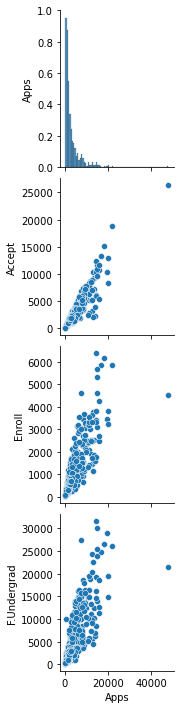

In [31]:
sns.pairplot(df, y_vars=top_corr_features.index, x_vars=['Apps'])

## EDA: Create histograms of all numerical columns
---

array([[<AxesSubplot:title={'center':'Private'}>,
        <AxesSubplot:title={'center':'Apps'}>,
        <AxesSubplot:title={'center':'Accept'}>,
        <AxesSubplot:title={'center':'Enroll'}>],
       [<AxesSubplot:title={'center':'Top10perc'}>,
        <AxesSubplot:title={'center':'Top25perc'}>,
        <AxesSubplot:title={'center':'F.Undergrad'}>,
        <AxesSubplot:title={'center':'P.Undergrad'}>],
       [<AxesSubplot:title={'center':'Outstate'}>,
        <AxesSubplot:title={'center':'Room.Board'}>,
        <AxesSubplot:title={'center':'Books'}>,
        <AxesSubplot:title={'center':'Personal'}>],
       [<AxesSubplot:title={'center':'PhD'}>,
        <AxesSubplot:title={'center':'Terminal'}>,
        <AxesSubplot:title={'center':'S.F.Ratio'}>,
        <AxesSubplot:title={'center':'perc.alumni'}>],
       [<AxesSubplot:title={'center':'Expend'}>,
        <AxesSubplot:title={'center':'Grad.Rate'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

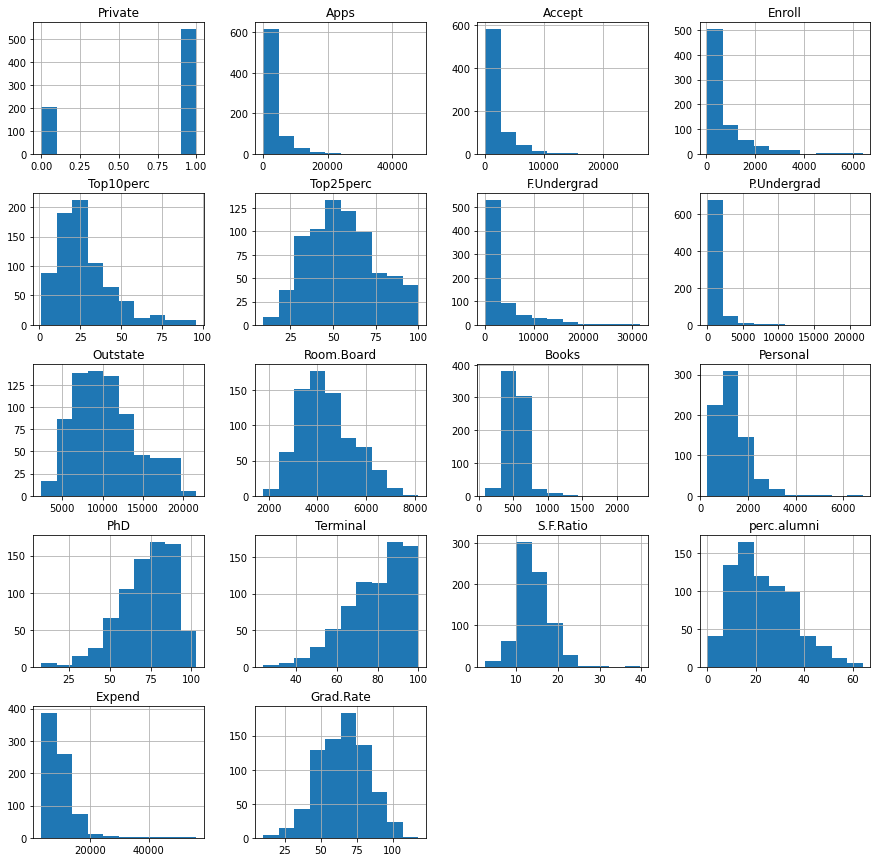

In [32]:
df.hist(figsize=(15,15))

## EDA: Boxplots
---

In the cells below, create two boxplots:
1. One for our target (`Apps`)
2. And one for our strongest predictor (`Accept`)

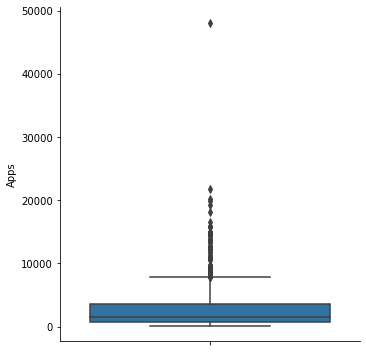

In [34]:
sns.catplot(data=df, y=df['Apps'], kind='box')

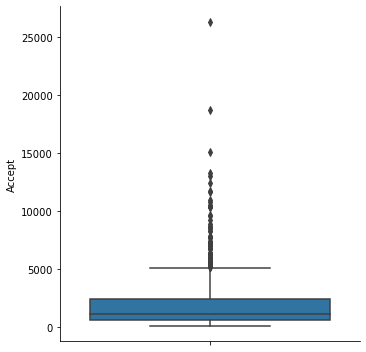

In [35]:
sns.catplot(data=df, y=df['Accept'], kind='box')

## Model Prep: Create our features matrix (`X`) and target vector (`y`)
---

Every **numerical** column (that is not our target) will be used as a feature.

The `Apps` column is our label: the number of applications received by that university.

In the cell below, create your `X` and `y` variables.

In [36]:
df._get_numeric_data().columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

In [37]:
features = [col for col in df._get_numeric_data().columns if col!= 'Apps']
features

['Private',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F.Undergrad',
 'P.Undergrad',
 'Outstate',
 'Room.Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S.F.Ratio',
 'perc.alumni',
 'Expend',
 'Grad.Rate']

## Model Prep: Train/test split
---

We always want to have a holdout set to test our model. Use the `train_test_split` function to split our `X` and `y` variables into a training set and a holdout set.

## Model Prep: Instantiate our model
---

Create an instance of `LinearRegression` in the cell below.

## Cross validation
---

Use `cross_val_score` to evaluate our model.

## Model Fitting and Evaluation
---

Fit the model to the training data, and evaluate the training and test scores below.